## Import Libraries and Define Auxiliary Functions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

In [2]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


## Exploratory Data Analysis

let's try to see how the FlightNumber (indicating the continuous launch attempts.) and Payload variables would affect the launch outcome.

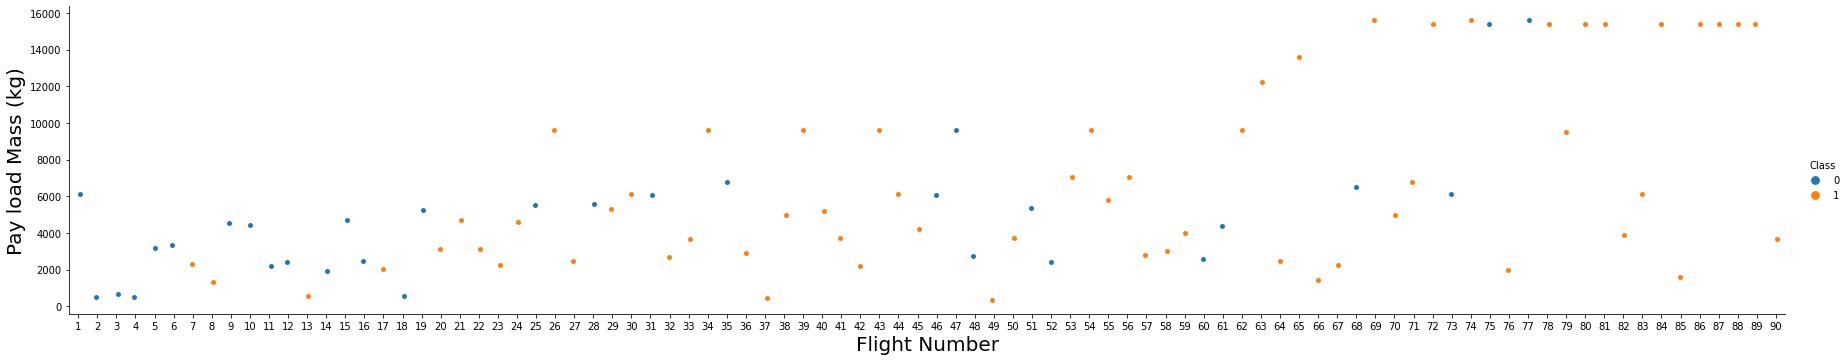

In [3]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.

### 1: Visualize the relationship between Flight Number and Launch Site

We see that different launch sites have different success rates. CCAFS LC-40, has a success rate of 60 %, while KSC LC-39A and VAFB SLC 4E has a success rate of 77%. Let's drill down to each site visualize its detailed launch records.

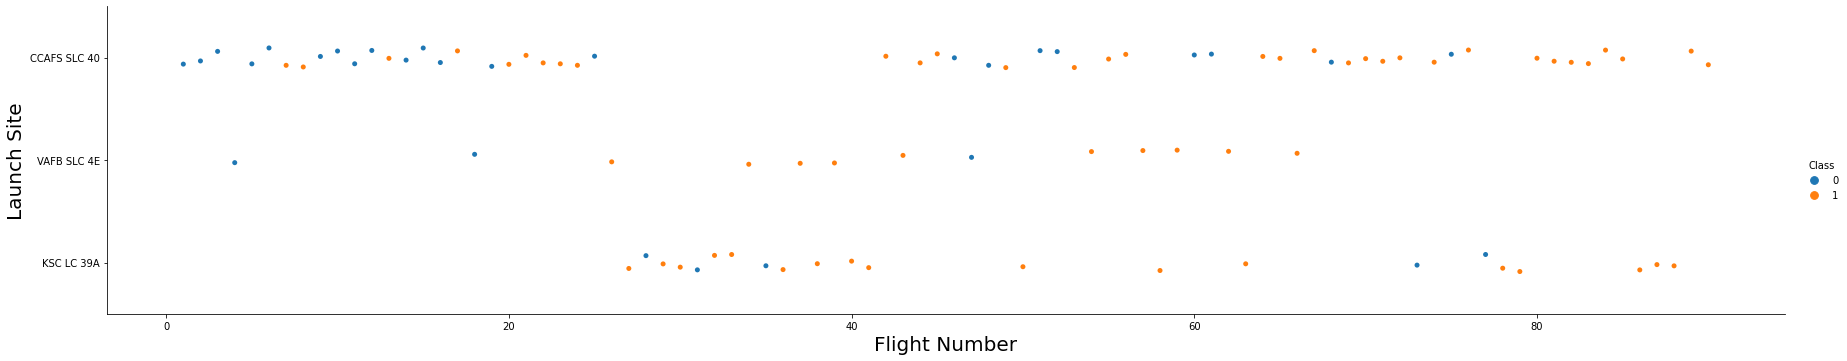

In [4]:
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

We detect that success rates are obviously different in different locations, KSC LC 39A and VAFB SLC 4E are better launch sites based on the plot. Flight number can afftect the success rate but the relationship is not very strong.

### 2: Visualize the relationship between Payload and Launch Site

We also want to observe if there is any relationship between launch sites and their payload mass.

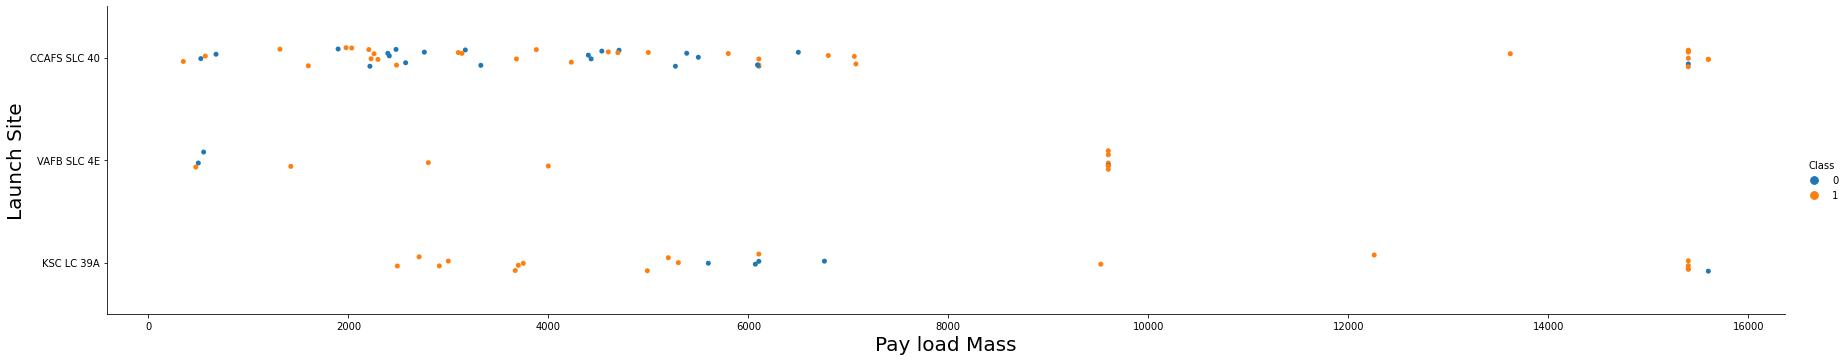

In [5]:
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("Pay load Mass",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

It is obvious that pay load mass positively impacts the success rate. We can also find for the VAFB-SLC launchsite there are no rockets launched for heavypayload mass(greater than 10000).

### 3: Visualize the relationship between success rate of each orbit type

Next, we want to visually check if there are any relationship between success rate and orbit type.

In [6]:
orbit_success = df.groupby(['Orbit'], as_index=False)['Class'].mean()
orbit_success.head()

,Orbit,Class
0,ES-L1,1.000000
1,GEO,1.000000
2,GTO,0.518519
3,HEO,1.000000
4,ISS,0.619048


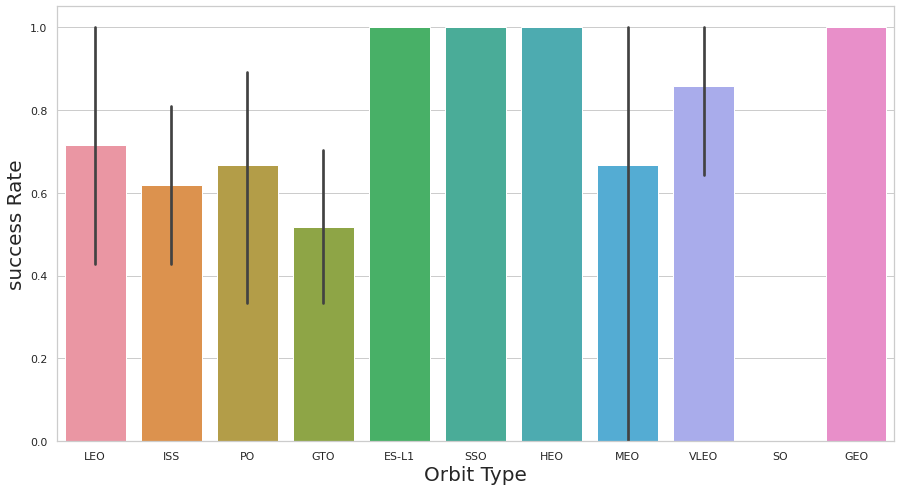

In [7]:
plt.figure(figsize=(15,8))

sns.set_theme(style="whitegrid")
sns.barplot(y="Class", x="Orbit", data=df)
plt.xlabel("Orbit Type",fontsize=20)
plt.ylabel("success Rate",fontsize=20)
plt.show()

ES-L1, SSO, HEO, and GEO have a sucess rate of 1. Other sites are around 0.6, the lowest one is about 0.5 sucess rate at GTO.

### 4: Visualize the relationship between FlightNumber and Orbit type

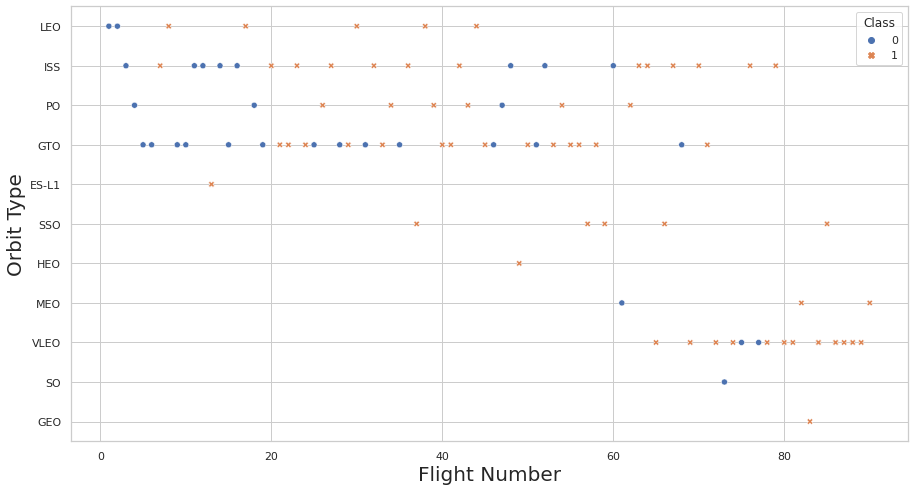

In [8]:
plt.figure(figsize=(15,8))

sns.scatterplot(data=df, x="FlightNumber", y="Orbit", hue="Class", style="Class")
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Orbit Type",fontsize=20)
plt.show()

We can see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit. Moreover, orbit types in the upper side of our plot usually have less than 60 flights, however, orbits types in the bottom side always have more than 40 flights.

### 5: Visualize the relationship between Payload and Orbit type

Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type.

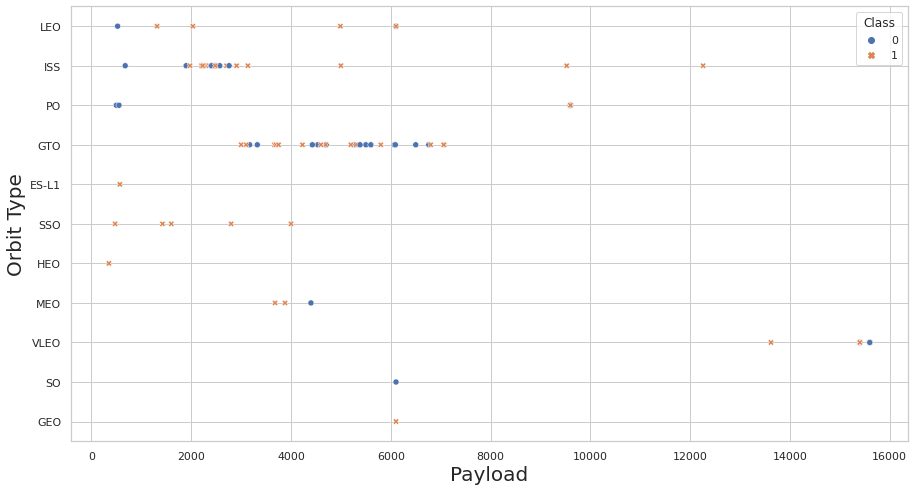

In [9]:
plt.figure(figsize=(15,8))

sns.scatterplot(data=df, x="PayloadMass", y="Orbit", hue="Class", style="Class")
plt.xlabel("Payload",fontsize=20)
plt.ylabel("Orbit Type",fontsize=20)
plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.

### 6: Visualize the launch success yearly trend

In [10]:
# A function to Extract years from the date 
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year

In [11]:
df['Year'] = Extract_year(df['Date'])

In [12]:
year_srate = df.groupby(['Year'], as_index=False)['Class'].mean()
year_srate.head()

,Year,Class
0,2010,0.000000
1,2012,0.000000
2,2013,0.000000
3,2014,0.333333
4,2015,0.333333


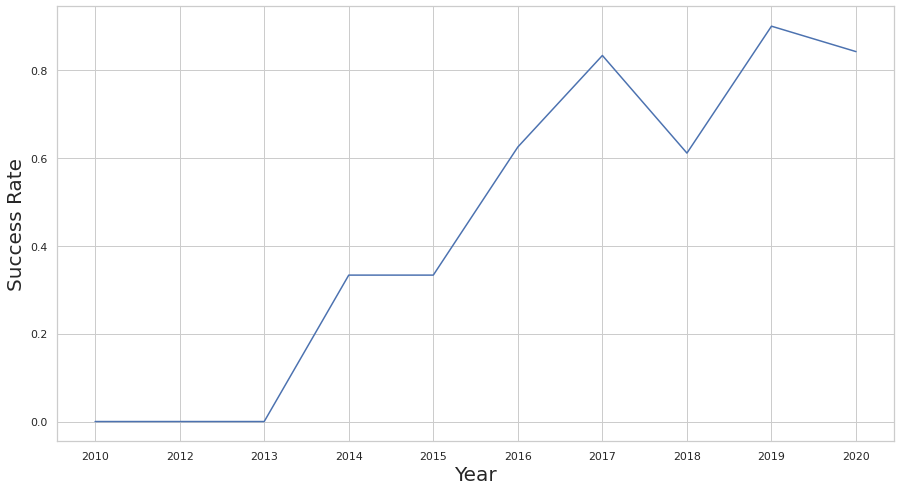

In [13]:
plt.figure(figsize=(15,8))

sns.lineplot(data=year_srate, x="Year", y="Class")
plt.xlabel("Year",fontsize=20)
plt.ylabel("Success Rate",fontsize=20)
plt.show()

We can observe that the sucess rate since 2013 kept increasing till 2020

## Features Engineering

BY now, we have some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction for futrue modeling.

In [14]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### Create dummy variables to categorical columns

In [15]:
# one hot encoding
features_one_hot = pd.concat([features,pd.get_dummies(df['Orbit'], prefix='Otype')], axis=1)
features_one_hot = pd.concat([features,pd.get_dummies(df['LaunchSite'], prefix='LaunchSite')], axis=1)
features_one_hot = pd.concat([features,pd.get_dummies(df['LandingPad'], prefix='LandingPad')], axis=1)
features_one_hot = pd.concat([features,pd.get_dummies(df['Serial'], prefix='Serial')], axis=1)

In [16]:
features_one_hot = features_one_hot.drop(['Orbit', 'LaunchSite', 'LandingPad', 'Serial'], axis=1)

In [17]:
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Serial_B0003,Serial_B0005,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Cast all numeric columns to float64

In [18]:
features_one_hot = features_one_hot.astype('float64')